In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import h5py
import json
import matplotlib 
# from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable
# from scipy.interpolate import UnivariateSpline

import os
import sys  

from ast import literal_eval
import ast

from qutip import  *

sys.path.append('../../scripts') 

from qutip_tools import *

In [2]:
# define basic figure sizes
bwidth=7
bheight=5
base_font = 20

matplotlib.rcParams.update({'font.size': base_font,"legend.fontsize":base_font-4 ,"font.family": "serif", 
                            "font.serif": "CMU Serif, Times New Roman",
                           'text.usetex' : True })

sns.set_palette("colorblind")

fig_route = "../../plots/manuscript_figs/"


In [3]:
ll=100 # QPC size
data_route = "../../data/exact_diag_new/L={}/".format(ll)
J=1


# Generate analysis Dataframe and save it
the reason I create a new dataframe instead of loading it is becasue its a pain to load 2d arrays this way and its just easier to generate them

In [4]:
file_list = get_file_names_on([], data_route)

In [5]:
# read the parameter dictionary to initialize 
param_dict, times, occupations, d0_density, qubit_rho, entropy = load_exact_diag(data_route, file_list[0])  

data_dict =  {key: [] for key in param_dict}
data_dict["times"] = []
data_dict["occupations"] = []
data_dict["d0_density"] = []
data_dict["qubit_rho"] = []
data_dict["entropy"] = []
data_dict["time_at_bond"] = []
data_dict["Max_entropy"] = []
data_dict["cos_theta"] = []
data_dict["sin_phi"] = []

for i in range(0,len(file_list)):
    file_name = file_list[i]
    param_dict, times, occupations, d0_density, qubit_rho, entropy = load_exact_diag(data_route, file_name) 
    # initialize the meta data
    for key in param_dict.keys():
        data_dict[key].append(param_dict[key])

    #  estimate the time that wavepacket spends at bondf
    bond_density = occupations[param_dict["bond_index"], :] + occupations[param_dict["bond_index"]+1, :]
    tau_bond = get_time_at_bond(times, bond_density)
    
    # get the bloch angles fo the qubit
    costheta_list, sinphi_list = get_bloch_angles_time(qubit_rho)

    # save raw data 
    data_dict["times"].append(times.astype(np.float32))
    data_dict["occupations"].append(occupations.astype(np.float32))
    data_dict["d0_density"].append(d0_density.astype(np.float32)) 
    data_dict["qubit_rho"].append(qubit_rho.astype(np.complex64))
    # normalize entropy by maximally entangled singled 
    data_dict["entropy"].append((entropy/np.log(2)).astype(np.float32))
    # save processed data
    data_dict["time_at_bond"].append(tau_bond)
    data_dict["Max_entropy"].append(max(entropy/np.log(2)))
    data_dict["cos_theta"].append(costheta_list)
    data_dict["sin_phi"].append(sinphi_list)

data_df = pd.DataFrame.from_dict(data_dict)

# data_df.to_csv("../../data/exp_pro/exact_diag_L={}.csv".format(ll))

not possible to estimate time at bond for 
not possible to estimate time at bond for 
not possible to estimate time at bond for 
not possible to estimate time at bond for 
not possible to estimate time at bond for 
not possible to estimate time at bond for 
not possible to estimate time at bond for 
not possible to estimate time at bond for 
not possible to estimate time at bond for 
not possible to estimate time at bond for 
not possible to estimate time at bond for 
not possible to estimate time at bond for 
not possible to estimate time at bond for 
not possible to estimate time at bond for 
not possible to estimate time at bond for 
not possible to estimate time at bond for 
not possible to estimate time at bond for 
not possible to estimate time at bond for 
not possible to estimate time at bond for 
not possible to estimate time at bond for 
not possible to estimate time at bond for 
not possible to estimate time at bond for 
not possible to estimate time at bond for 
not possibl

In [10]:
# If we would like to load it anyways
"""data_df = pd.read_csv('../../data/exp_pro/exact_diag_L={}.csv'.format(ll))

data_df = data_df.drop(["Unnamed: 0"], axis=1).drop_duplicates()
data_df["times"] = data_df["times"].apply(lambda x: [float(i) for i in ast.literal_eval(x)])
data_df["entropy"] = data_df["entropy"].apply(lambda x: [float(i) for i in ast.literal_eval(x)])"""

print("Number of data points:", len(data_df))
print(data_df.columns)


Number of data points: 4784
Index(['L_qpc', 'Omega', 't', 'J', 'Jp', 'bond_index', 'K0', 'X0', 'Spread',
       'maxt_time', 'del_tau', 'qubit_init', 'Re_qubit_0', 'Im_qubit_0',
       'Re_qubit_1', 'Im_qubit_1', 'phi', 'alfabond', 'times', 'occupations',
       'd0_density', 'qubit_rho', 'entropy', 'time_at_bond', 'Max_entropy',
       'cos_theta', 'sin_phi'],
      dtype='object')


Defining the parameters

In [11]:
Om_ = 0.3 # interaction strenght
X0_ = 30  # initial position

print("Values we are looking at")
af = data_df["alfabond"].sort_values().unique()[2]
print(np.cos(af/2)**2)
data_df["alfabond"].sort_values().unique()
data_df["X0"].unique()

Values we are looking at
0.8535533905932737


array([30])

# Entropy Phase Diagram and Spectrum

In [12]:
# filter out for the parameters we want 
cond_ = (data_df["Omega"]==Om_)  & (data_df["qubit_init"]=="fixed") & (data_df["X0"]==X0_) & (data_df["alfabond"]==af)

data_S = data_df[cond_].sort_values(by="K0")

S_df = data_S.pivot(index='K0', columns='t', values='Max_entropy')
S_df

t,0.0001,0.0010,0.0100,0.0200,0.0300,0.0400,0.0500,0.0600,0.0700,0.0800,...,0.3000,0.4000,0.5000,0.7000,0.8000,0.9000,1.0000,2.0000,3.0000,5.0000
K0,,,,,,,,,,,,,,,,,,,,,
0.157080,0.397372,0.384183,0.287111,0.293506,0.338504,0.322504,0.265735,0.238783,0.244579,0.258241,...,0.164017,0.143839,0.137716,0.116074,0.085141,0.133921,0.078964,0.007606,0.002102,0.000760
0.314159,0.402662,0.411204,0.503787,0.538995,0.527189,0.521525,0.491391,0.451457,0.411788,0.376149,...,0.203696,0.184032,0.164681,0.169876,0.135107,0.136801,0.133471,0.007668,0.002001,0.000719
0.471239,0.309272,0.313448,0.358923,0.397346,0.415030,0.420994,0.421851,0.419125,0.414626,0.408047,...,0.171824,0.158083,0.147135,0.124902,0.121770,0.110621,0.104378,0.006880,0.001878,0.000662
0.628319,0.233867,0.235436,0.252477,0.271226,0.286672,0.297947,0.305649,0.310815,0.314348,0.316801,...,0.152630,0.125774,0.115973,0.101219,0.095341,0.089756,0.084894,0.006191,0.001811,0.000657
0.785398,0.185104,0.185808,0.193358,0.202168,0.210569,0.217972,0.224129,0.229086,0.233077,0.236418,...,0.209323,0.128582,0.096317,0.084120,0.079781,0.075964,0.072591,0.005838,0.001783,0.000650
0.942478,0.154008,0.154389,0.158408,0.163117,0.167798,0.172209,0.176179,0.179618,0.182514,0.184920,...,0.221081,0.186037,0.118629,0.073163,0.070060,0.067749,0.065987,0.005607,0.001904,0.000698
1.099557,0.134203,0.134445,0.136950,0.139846,0.142740,0.145525,0.148108,0.150426,0.152442,0.154144,...,0.175991,0.187637,0.174001,0.080741,0.066310,0.064982,0.065176,0.005033,0.001936,0.000770
1.178097,0.127307,0.127510,0.129597,0.131987,0.134368,0.136662,0.138802,0.140735,0.142429,0.143867,...,0.157609,0.168430,0.175879,0.103609,0.073226,0.066096,0.067480,0.005212,0.002056,0.000703
1.256637,0.121996,0.122172,0.123971,0.126012,0.128035,0.129981,0.131798,0.133444,0.134890,0.136120,...,0.143940,0.151515,0.162982,0.133923,0.093441,0.073527,0.072435,0.004905,0.001878,0.000771


In [23]:
def plot_verticals(ax, tvals, tmarkers, clists):
    vdf = data_S[data_S["t"]== tvals].sort_values(by="K0")
    k0_values = vdf["K0"].unique()
    
    for i in range(0,len(k0_values)):
        ki = k0_values[i]
        cond_df = vdf[vdf["K0"] == ki]
        x_vals = cond_df["times"].item()
        y_vals = cond_df["entropy"].item()
        ax.plot(x_vals, y_vals, color=clists[i], linewidth = 3.1)
    
        # plot marker at maximum entropy
        #idx = np.argmax(y_vals)
        idx = -10
        ax.scatter(x_vals[idx], y_vals[idx], s=85, edgecolor="black",color=clists[i], marker=tmarkers,zorder=7)
    
    ax.set_ylabel(r"$S(\tau)/\ln 2$")
    ax.set_xlabel(r"$\tau$",labelpad=-0.1)
    
    ax.set_ylim(-0.02,0.45)


def plot_horizontals(ax, kvals, kmarkers, clists):
    vdf = data_S[data_S["K0"]== kvals].sort_values(by="t")
    t_values = vdf["t"].unique()
    
    for i in range(0,len(t_values)):
        ti = t_values[i]
        cond_df = vdf[vdf["t"] == ti]
        x_vals = cond_df["times"].item()
        y_vals = cond_df["entropy"].item()
        ax.plot(x_vals, y_vals, color=clists[i], linewidth = 3.1)
    
        # plot marker at maximum entropy
        # idx = np.argmax(y_vals)
        idx = -10
        ax.scatter(x_vals[idx], y_vals[idx], s=85, edgecolor="black",color=clists[i], marker=kmarkers,zorder=7)
    
    ax.set_ylabel(r"$S/\ln{2}$")
    ax.set_xlabel(r"$\tau$")
    
    ax.set_ylim(-0.02,0.5)


In [24]:
def plot_maxS_vertical(ax, tvals_list, clists_list, marker_list): 
    
    for j in range(0, len(tvals_list)):
        tvals = tvals_list[j]
        clists = clists_list[j]
        vdf = data_S[data_S["t"]== tvals].sort_values(by="K0")
        m_ = marker_list[j]
        for i in range(0,len(K0_unique)):
            ki = K0_unique[i]
            yval = vdf[vdf["K0"]==ki]["Max_entropy"].item()
            ax.scatter(K0_unique[i], yval, c=[clists[i]], s=85, edgecolor='black', marker=m_)

    ax.axvline(0.4*np.pi/2, linestyle = "dotted", c="red", linewidth=3, zorder=0)
    
    ax.set_xlabel(r"$k_0/J$",labelpad=-0.1)
    ax.set_ylabel(r"$S_{\rm Max}/\ln{2}$")

def plot_maxS_horizontal(ax, kvals_list, clists_list, marker_list): 
    
    for j in range(0, len(kvals_list)):
        kvals = kvals_list[j]
        clists = clists_list[j]
        vdf = data_S[data_S["K0"]== kvals].sort_values(by="t")
        m_ = marker_list[j]
        t_unique = np.sort(data_S["t"].unique())
        for i in range(0,len(t_unique)):
            ti = t_unique[i]
            yval = vdf[vdf["t"]==ti]["Max_entropy"].item()
            ax.scatter(t_unique[i], yval, c=[clists[i]], s=85, edgecolor='black', marker=m_)

    ax.axvline(np.pi/(ll+1), linestyle = "dashed", c="red", linewidth=3, zorder=0)
    ax.axvline(J, linestyle = "dashed", c="red", linewidth=3, zorder=0)
    ax.set_xscale("log")
    
    ax.set_xlabel(r"$\omega/J$",labelpad=-0.1)
    ax.set_ylabel(r"$S_{\rm max}/\ln{2}$")



In [25]:
def plot_transmision(ax, k_list, t_, color_list): 
    for i in range(0,len(k_list)):
        ki = k_list[i]
        # for slow particles
        curr_df = data_S[data_S["K0"]== ki]
        bindex = curr_df[curr_df["t"]==t_]["bond_index"].item()
        occ_matrix = curr_df[curr_df["t"]==t_]["occupations"].item()
        bond_density1 = occ_matrix[bindex, :] + occ_matrix[bindex+1, :] 
        transmission1 = np.sum(occ_matrix[bindex+2:,:], axis=0)

        ax.plot(bond_density1,c = color_list[i], linestyle="dashed",linewidth=3)
        ax.plot(transmission1, c = color_list[i],linewidth=3.5)
        
    ax.set_xlabel(r"$\tau$", labelpad=0.01)
    ax.set_ylabel(r"$|\psi_n|$")
    ax.set_ylim(-0.04,1)
    

In [26]:
def S_heatmap(ax, t1_, t2_, k01_, k02_):
    vg_array = S_df.index
    t_array = S_df.columns
    im = ax.contourf(t_array, vg_array, S_df.values,levels=10)
    
    # plot vertical cuts
    for ki in range(0,len(K0_unique)):
        ax.scatter(t1_, K0_unique[ki], s=110, edgecolor="black",color=colorsv1[ki], zorder=3)
        ax.scatter(t2_, K0_unique[ki], s=110, edgecolor="black",marker="v",color=colorsv2[ki], zorder=3)
        
    # plot horizontal cuts
    for ti in range(0,len(t_unique)):
        ax.scatter(t_unique[ti], k01_, s=150, edgecolor="black",marker="D", color=colors_h1[ti], zorder=3)
        ax.scatter(t_unique[ti],k02_, s=150, edgecolor="black",marker="s",color=colors_h2[ti], zorder=3)
    
    ax.set_xscale('log')
    
    # Add anotate the regions
    y_tick = np.pi/2 -0.04
    ax.annotate(
        r'$\omega=\rm{min}[ \Delta E(k)]$', 
        xy=(np.pi/(ll+1), y_tick), 
        xytext=(np.pi/(ll+1) - 0.01, y_tick + 0.06), fontsize=base_font,ha='center')
    ax.annotate(
        r'$\omega=J$', 
        xy=(J+0.01, y_tick), 
        xytext=(J, y_tick + 0.06), fontsize=base_font,ha='center')
    
    # Add the labels for each region
    """ax.annotate('II', xy=(0.1+np.pi/50, 0.65*np.pi/2), 
                xytext=(0.1+np.pi/50, 0.65*np.pi/2),ha='center', c="red", fontsize= 60,fontweight='bold')
    
    ax.annotate('III', xy=(0.005, 0.65*np.pi/2), 
                xytext=(0.005, 0.65*np.pi/2),ha='center', c="red", fontsize= 60,fontweight='bold')
    
    ax.annotate('I', xy=(2.0, 0.65*np.pi/2), 
                xytext=(2.0, 0.65*np.pi/2),ha='center', c="red", fontsize= 60,fontweight='bold')"""
    
    ax.axvline(np.pi/(ll+1), color='red', lw=4, linestyle="dashed", clip_on=False)  # tick-like line
    ax.axvline(J,color='red', lw=4, linestyle="dashed", clip_on=False )

    ax.hlines([0.35*np.pi/2], xmin=0.0001, xmax=J, color='red', lw=4, linestyle="dotted", clip_on=False)  # tick-like line

    ax.set_xticks( [0.001, 0.01,0.1,1.0,3], [0.001, 0.01,0.1,1.0,3] ,fontsize=base_font-1)
    ax.set_yticks( [0.20*np.pi,0.35*np.pi,0.50*np.pi], labels=[r"$0.20 \pi$",r"$0.35\pi$",r"$0.50\pi$"],fontsize=base_font-1)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.03)
    fig = ax.figure
    cbar = fig.colorbar(im, cax, shrink=0.9)   
    cbar.ax.set_ylabel(r'$S_{\rm max}/\ln{2}$', rotation=90, fontsize=base_font)
    
    ax.set_ylabel(r"$k_0/J$",fontweight='bold',fontsize=base_font)
    ax.set_xlabel(r"$\omega/J$",fontweight='bold',fontsize=base_font)



In [27]:
# colors
# For the vertical line cuts
K0_unique = np.sort(data_S["K0"].unique())

colorsv1 = plt.cm.Greens(np.linspace(0.3, 1.0,len(K0_unique)))
colorsv2 = plt.cm.Greens(np.linspace(0.3, 1.0,len(K0_unique)))

# For the horizontal line cuts
t_unique = np.sort(data_S["t"].unique())
colors_h1 = plt.cm.Purples(np.linspace(0.3,1.0,len(t_unique)))
colors_h2 = plt.cm.Purples(np.linspace(0.3,1.0,len(t_unique)))


### Option 1

In [37]:
tvals_list = [0.001, 0.2]
kvals_list = [K0_unique[0],K0_unique[-8]]
vlists_list = [colorsv1, colorsv2]
hlists_list = [colors_h1, colors_h2]
high_colors = ["black", "grey"]

vmarker_list = ["o", "v"]
hmarker_list = ["D", "s"]

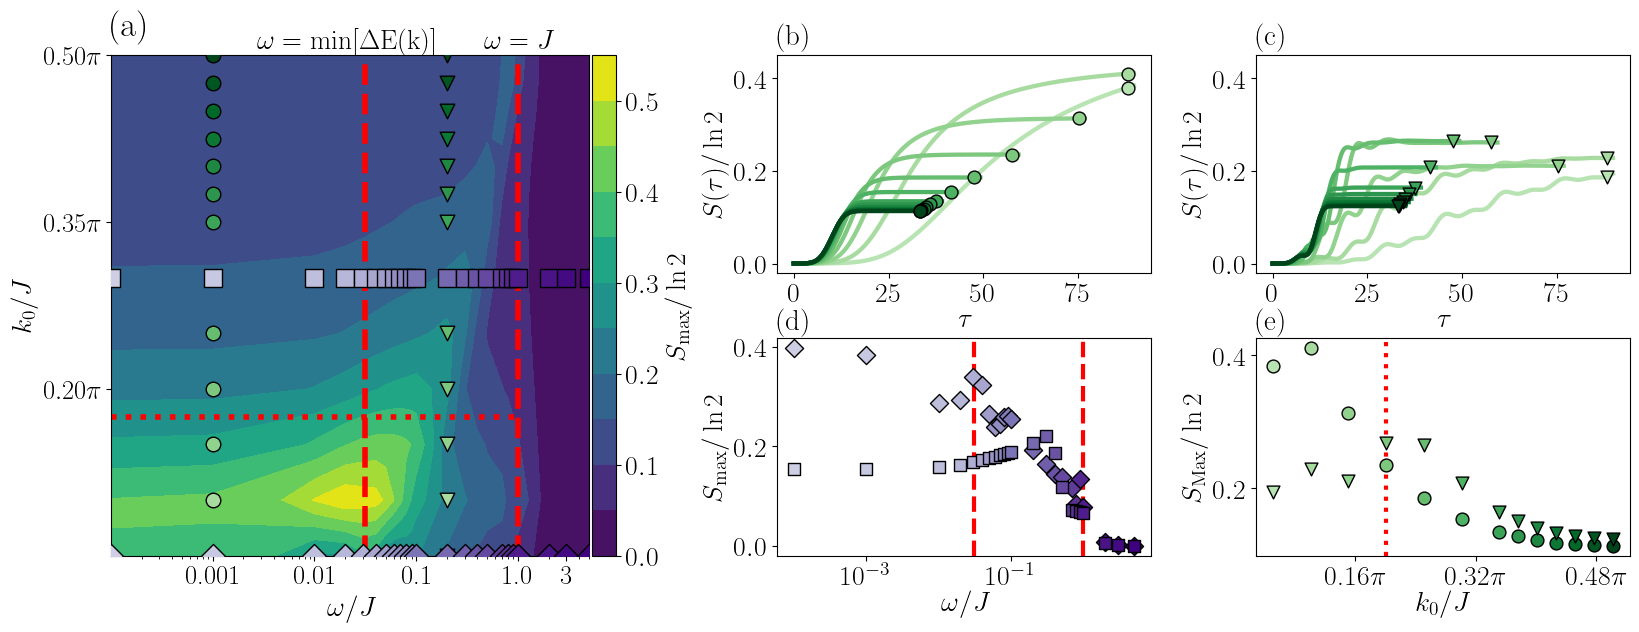

In [38]:

fig2 = plt.figure(figsize=(2.8*bwidth, 1.3*bheight))
gs = fig2.add_gridspec(2, 3,wspace=0.24, hspace=0.3,  width_ratios=[1.8, 1.2, 1.2])

axA = fig2.add_subplot(gs[:, 0]) # heatmap
axB = fig2.add_subplot(gs[0, 1])   
axC = fig2.add_subplot(gs[0, 2])  
axD = fig2.add_subplot(gs[1, 1]) 
axE = fig2.add_subplot(gs[1, 2])   

S_heatmap(axA, t1_=tvals_list[0], t2_=tvals_list[1], k01_= kvals_list[0] 
            ,k02_= kvals_list[1])

plot_verticals(axB, tvals_list[0], "o", colorsv1)
plot_verticals(axC, tvals_list[1], "v", colorsv2)
plot_maxS_horizontal(axD, kvals_list, hlists_list, hmarker_list)
plot_maxS_vertical(axE, tvals_list, vlists_list, vmarker_list)

# annotations for upper plots
axA.annotate(r"(a)", xy=[0.0,1.04], fontsize=25, xycoords="axes fraction")
axB.annotate(r"(b)", xy=[0.0,1.05], fontsize=21, xycoords="axes fraction")
axC.annotate(r"(c)", xy=[0.0,1.05], fontsize=21, xycoords="axes fraction")

# annotations for lower plots
axD.annotate(r"(d)", xy=[0.0,1.04], fontsize=21, xycoords="axes fraction")
axE.annotate(r"(e)", xy=[0.0,1.04], fontsize=21, xycoords="axes fraction")


# adjust padding on the colorbar
pos = axA.get_position()
axA.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
# put the x axis in units of pi # write x axis in units of pi
plt.subplot(gs[1, 2]).xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda val,pos: 
                                                             r'{:.2g}$\pi$'.format(val/np.pi) if val !=0 
                                                             else '0'))

plt.savefig(fig_route+"entropy_phase_diagramV1.pdf",transparent=True)

### Option 2


fig2 = plt.figure(figsize=(3.1*bwidth, 1.3*bheight))
gs = fig2.add_gridspec(2, 4,wspace=0.23, hspace=0.3,  width_ratios=[2., 1, 1, 1])

axA = fig2.add_subplot(gs[:, 0]) # heatmap
axB = fig2.add_subplot(gs[0, 1])  # vertical cut 1 
axC = fig2.add_subplot(gs[0, 2]) # vertical cut 2 
axD = fig2.add_subplot(gs[1, 1]) # horizontal cut 1 
axE = fig2.add_subplot(gs[1, 2]) # horizontal cut 2 
axF = fig2.add_subplot(gs[0, 3]) # Transmision Reg I
axG = fig2.add_subplot(gs[1, 3]) # Transmision Reg II


S_heatmap(axA, t1_=tvals_list[0], t2_=tvals_list[1], k01_= kvals_list[0] 
            ,k02_= kvals_list[1])

plot_verticals(axB, tvals_list[0], "o", colorsv1)
plot_verticals(axC, tvals_list[1], "v", colorsv2)
plot_horizontals(axD, kvals_list[0], "D", colors_h1)
plot_horizontals(axE, kvals_list[1], "D", colors_h1)
plot_transmision(axF, kvals_list, 0.001, ["black", "grey"])
plot_transmision(axG, kvals_list, 0.2, ["black", "grey"])

# annotations for upper plots
axA.annotate(r"(a)", xy=[0.0,1.04], fontsize=25, xycoords="axes fraction")
axB.annotate(r"(b)", xy=[0.0,1.05], fontsize=21, xycoords="axes fraction")
axC.annotate(r"(c)", xy=[0.0,1.05], fontsize=21, xycoords="axes fraction")
axF.annotate(r"(f)", xy=[0.0,1.05], fontsize=21, xycoords="axes fraction")

# annotations for lower plots
axD.annotate(r"(d)", xy=[0.0,1.04], fontsize=21, xycoords="axes fraction")
axE.annotate(r"(e)", xy=[0.0,1.04], fontsize=21, xycoords="axes fraction")
axG.annotate(r"(g)", xy=[0.0,1.04], fontsize=21, xycoords="axes fraction")

# annotate the region in the transmission
axF.annotate(r"III", xy=[0.7,0.3], color="red", xycoords="axes fraction",fontsize= 50,fontweight='bold')
axG.annotate(r"II", xy=[0.7,0.3], color="red", xycoords="axes fraction",fontsize= 50,fontweight='bold')

pos = axA.get_position()
axA.set_position([pos.x0, pos.y0, pos.width * 0.8, pos.height])

plt.savefig(fig_route+"entropy_phase_diagramV2.pdf",transparent=True)

### Looking at the wavefunction directly

In [39]:
kvals_list

[0.15707963267948966, 0.9424777960769379]

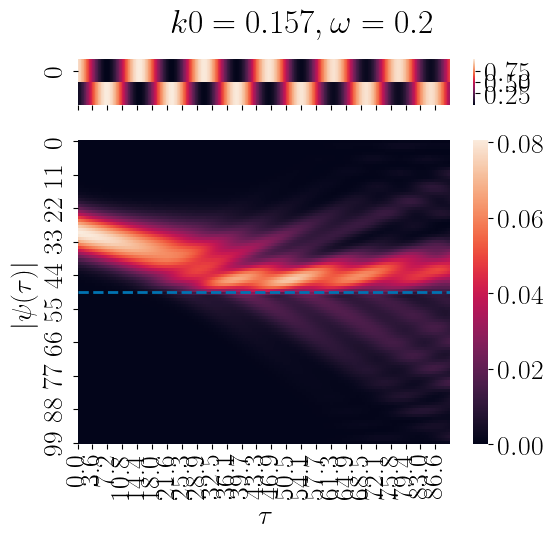

In [56]:
cond_ = (data_S["K0"] == kvals_list[0]) & (data_S["t"] == tvals_list[1]) 

curr_df = data_S[cond_]

fig, ax = plt.subplots(2,1,figsize=(bwidth-1,bheight), sharex=True ,gridspec_kw={'height_ratios': [0.15, 1]})
plt.suptitle(r"$k0={:.3f}, \omega={}$".format( kvals_list[0], tvals_list[1]))
# n_d1
n_d1 = curr_df["d0_density"].item()
sns.heatmap([n_d1,1-n_d1],ax=ax[0])
traj_matrix = curr_df["occupations"].item()
time_range = curr_df["times"].item()
sns.heatmap(traj_matrix,ax=ax[1])

ax[1].set_xlabel(r"$\tau$")
ax[1].set_ylabel(r"$|\psi(\tau)|$")

# time ticks
delta_tau = time_range[1] - time_range[0]
tick_posx = np.arange(0,len(time_range),20)
xtick_label = np.around(tick_posx*(delta_tau),decimals=1)

ax[1].axhline(curr_df["bond_index"].item(), linewidth=2, linestyle="dashed")
ax[1].set_xticks(tick_posx,xtick_label);


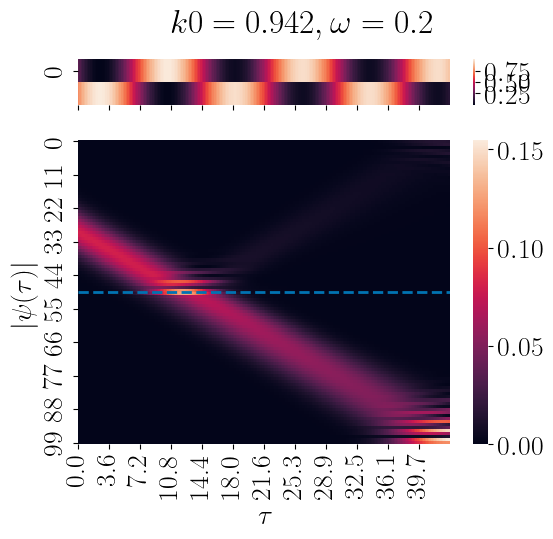

In [57]:
cond_ = (data_S["K0"] == kvals_list[1]) & (data_S["t"] == tvals_list[1]) 

curr_df = data_S[cond_]

fig, ax = plt.subplots(2,1,figsize=(bwidth-1,bheight), sharex=True ,gridspec_kw={'height_ratios': [0.15, 1]})
plt.suptitle(r"$k0={:.3f}, \omega={}$".format( kvals_list[1], tvals_list[1]))
# n_d1
n_d1 = curr_df["d0_density"].item()
sns.heatmap([n_d1,1-n_d1],ax=ax[0])
traj_matrix = curr_df["occupations"].item()
time_range = curr_df["times"].item()
sns.heatmap(traj_matrix,ax=ax[1])

ax[1].set_xlabel(r"$\tau$")
ax[1].set_ylabel(r"$|\psi(\tau)|$")

# time ticks
delta_tau = time_range[1] - time_range[0]
tick_posx = np.arange(0,len(time_range),20)
xtick_label = np.around(tick_posx*(delta_tau),decimals=1)

ax[1].axhline(curr_df["bond_index"].item(), linewidth=2, linestyle="dashed")
ax[1].set_xticks(tick_posx,xtick_label);